# **Importing Modules**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from skimage.color import rgb2gray 
from skimage.transform import resize 
from skimage import data,feature
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# **Taking dataset**

In [2]:
datasetpath = '/kaggle/input/grapeds'

converting dataset to batchs by tensorflow pipeline

In [3]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


# **conveting dataset to HoG**

In [4]:

dataseth = []
datalabel = []
featureo =[]
for image_batch, labels_batch in dataset.take(150):
    for i in range(30):
        img = image_batch[i].numpy().astype("float")
        grayim = rgb2gray(img) 
        gI1 = resize(grayim,(80,80))
        (H, hogImage) = feature.hog(gI1, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), transform_sqrt=True, visualize=True)
        image = np.array(hogImage).flatten()
        dataseth.append(H)
        featureo.append(image)
        datalabel.append(labels_batch[i])

# **Implementing KNN**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
x_train,x_test,y_train,y_test = train_test_split(featureo,datalabel,test_size= 0.18)
knn.fit(x_train,y_train)

In [6]:
knn.score(x_test,y_test)

0.7388888888888889

In [7]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm =confusion_matrix(y_test,y_pred)
cm

array([[141,  11,  10],
       [ 64, 124,   5],
       [ 59,   4, 122]])

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')


Text(42.0, 0.5, 'truth')
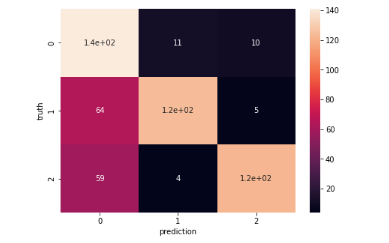


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

 precision           recall   f1-score     support

           0       0.60      0.85      0.71       179
           1       0.91      0.71      0.79       194
           2       0.81      0.65      0.72       167

    accuracy                           0.74       540
    macro avg 
    0.77      0.74      0.74       540

    weighted avg  
    0.78      0.74      0.74       540


In [15]:
acc = []
loss = []
for i in range(20):
    knn = KNeighborsClassifier(n_neighbors=9)
    x_train,x_test,y_train,y_test = train_test_split(featureo,datalabel,test_size= 0.18)
    knn.fit(x_train,y_train)
    acc1 = knn.score(x_test,y_test)
    acc.append(acc1)
    i= i-1
    

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(range(20), acc, label='Training Accuracy')
# plt.plot(EPOCHS, acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')
plt.show()

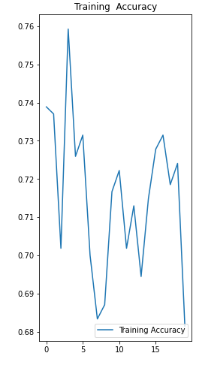
